# Objective:

Zomato is a worldwide Indian restaurant aggregator and food delivery service that offers information on restaurants, menus, and customer reviews in addition to food delivery choices from partner restaurants in a few cities.

Bangalore is home to restaurants from all over the world, and more are opening there every day. They now find it challenging to compete with restaurants that have already achieved success. The main problems that they continue to face include high real estate prices, rising food prices, a disjointed supply chain, excessive licencing, etc.

The goal of this project is to estimate the cost for two guests at a time, so that recently opened and prospective restaurants will know how much money to invest in other stuff like ambiance and customer service

## Approach

Content:

1. Data Cleaning
   
   1.1. Drop redundant and unwanted columns

   1.2. Handling Null values

   1.3. Remove special characters

2. EDA

   2.1. Visualizations

   2.2. Outliers


3. Model Building

   3.1. Linear Regression
    
   3.2. Lasso
  
   3.3. Ridge

   3.4. Elastinet

   3.5. Decision Tree Regressor

   3.6. Random Forest Regressor

4. Conclusion

### Understanding the dataset

In [1]:
import numpy as np
import pandas as pd
import statsmodels.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('zomato.csv')
df.head(2)

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari


In [3]:
df.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [4]:
df.shape

(51717, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

## 1.Data Cleaning

### 1.1.Drop redundant and unwanted columns

In [6]:
df=df.drop(['url','address','name','phone','rest_type','dish_liked','reviews_list','menu_item'],axis=1)

In [7]:
# URL,Name,Address and Phone are not useful in predicting cost.
# Dish_liked,reviews_list and menu_items will increase the complexity of the process due to too many elements in them.
# Listed_in(city) 

### 1.2.Remove null values

In [8]:
df.isnull().sum()/len(df)*100

online_order                    0.000000
book_table                      0.000000
rate                           15.033741
votes                           0.000000
location                        0.040606
cuisines                        0.087012
approx_cost(for two people)     0.669026
listed_in(type)                 0.000000
listed_in(city)                 0.000000
dtype: float64

In [9]:
df['rate']=df['rate'].fillna(df['rate'].mode()[0])

In [10]:
df=df.dropna()

# Since the null values in other columns are very few in number it is advised it drop them raather than imputing them with a value.

In [11]:
df.isnull().sum()/len(df)*100

online_order                   0.0
book_table                     0.0
rate                           0.0
votes                          0.0
location                       0.0
cuisines                       0.0
approx_cost(for two people)    0.0
listed_in(type)                0.0
listed_in(city)                0.0
dtype: float64

In [12]:
df.drop_duplicates(inplace=True)
df.shape

(50812, 9)

In [13]:
df.shape

# It does not have any duplicates.

(50812, 9)

### 1.3.Remove the special characters

In [14]:
df['rate']=df['rate'].apply(lambda x:str(x).split('/')[0])

In [15]:
df.dtypes

online_order                   object
book_table                     object
rate                           object
votes                           int64
location                       object
cuisines                       object
approx_cost(for two people)    object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [16]:
print('original values:',df['rate'].unique())

df['rate'].apply(lambda x:str(x).replace(' ',''))
df['rate'].replace(to_replace=['NEW','-'],value=[0,0],inplace=True)

print('new values:',df['rate'].unique())

df['rate']=df['rate'].astype(float)
df['rate'].dtypes

original values: ['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' 'NEW' '2.9' '3.5' '2.6' '3.8 ' '3.4' '4.5' '2.5' '2.7'
 '4.7' '2.4' '2.2' '2.3' '3.4 ' '-' '3.6 ' '4.8' '3.9 ' '4.2 ' '4.0 '
 '4.1 ' '3.7 ' '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 ' '3.2 '
 '2.6 ' '4.5 ' '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 ' '3.0 '
 '4.8 ' '2.3 ' '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ']
new values: ['4.1' '3.8' '3.7' '3.6' '4.6' '4.0' '4.2' '3.9' '3.1' '3.0' '3.2' '3.3'
 '2.8' '4.4' '4.3' 0 '2.9' '3.5' '2.6' '3.8 ' '3.4' '4.5' '2.5' '2.7'
 '4.7' '2.4' '2.2' '2.3' '3.4 ' '3.6 ' '4.8' '3.9 ' '4.2 ' '4.0 ' '4.1 '
 '3.7 ' '3.1 ' '2.9 ' '3.3 ' '2.8 ' '3.5 ' '2.7 ' '2.5 ' '3.2 ' '2.6 '
 '4.5 ' '4.3 ' '4.4 ' '4.9' '2.1' '2.0' '1.8' '4.6 ' '4.9 ' '3.0 ' '4.8 '
 '2.3 ' '4.7 ' '2.4 ' '2.1 ' '2.2 ' '2.0 ' '1.8 ']


dtype('float64')

In [17]:
df['rate'].median()

3.6

In [18]:
df['rate'].replace(to_replace=[0],value=[3.6],inplace=True)


In [19]:
print('original values:',df['approx_cost(for two people)'].unique())

df['approx_cost(for two people)'].apply(lambda x:str(x).replace(' ',''))
df['approx_cost(for two people)'].replace(to_replace=['NEW','-'],value=[0,0],inplace=True)
df['approx_cost(for two people)']=df['approx_cost(for two people)'].replace(',','',regex=True)

print('new values:',df['approx_cost(for two people)'].unique())

df['approx_cost(for two people)']=df['approx_cost(for two people)'].astype(float)
df['approx_cost(for two people)'].dtypes

original values: ['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1,200' '350' '250' '950' '1,000' '1,500' '1,300' '199'
 '80' '1,100' '160' '1,600' '230' '130' '50' '190' '1,700' '1,400' '180'
 '1,350' '2,200' '2,000' '1,800' '1,900' '330' '2,500' '2,100' '3,000'
 '2,800' '3,400' '40' '1,250' '3,500' '4,000' '2,400' '2,600' '120'
 '1,450' '469' '70' '3,200' '60' '560' '240' '360' '6,000' '1,050' '2,300'
 '4,100' '5,000' '3,700' '1,650' '2,700' '4,500' '140']
new values: ['800' '300' '600' '700' '550' '500' '450' '650' '400' '900' '200' '750'
 '150' '850' '100' '1200' '350' '250' '950' '1000' '1500' '1300' '199'
 '80' '1100' '160' '1600' '230' '130' '50' '190' '1700' '1400' '180'
 '1350' '2200' '2000' '1800' '1900' '330' '2500' '2100' '3000' '2800'
 '3400' '40' '1250' '3500' '4000' '2400' '2600' '120' '1450' '469' '70'
 '3200' '60' '560' '240' '360' '6000' '1050' '2300' '4100' '5000' '3700'
 '1650' '2700' '4500' '140']


dtype('float64')

In [20]:
df.dtypes

online_order                    object
book_table                      object
rate                           float64
votes                            int64
location                        object
cuisines                        object
approx_cost(for two people)    float64
listed_in(type)                 object
listed_in(city)                 object
dtype: object

## 2.EDA

### 2.1.Visualizations

In [21]:
num = df.select_dtypes(include=np.number)
num.head(2)

,rate,votes,approx_cost(for two people)
0,4.1,775,800.0
1,4.1,787,800.0


In [22]:
cat = df.select_dtypes(exclude=np.number)
cat.head(2)

,online_order,book_table,location,cuisines,listed_in(type),listed_in(city)
0,Yes,Yes,Banashankari,"North Indian, Mughlai, Chinese",Buffet,Banashankari
1,Yes,No,Banashankari,"Chinese, North Indian, Thai",Buffet,Banashankari


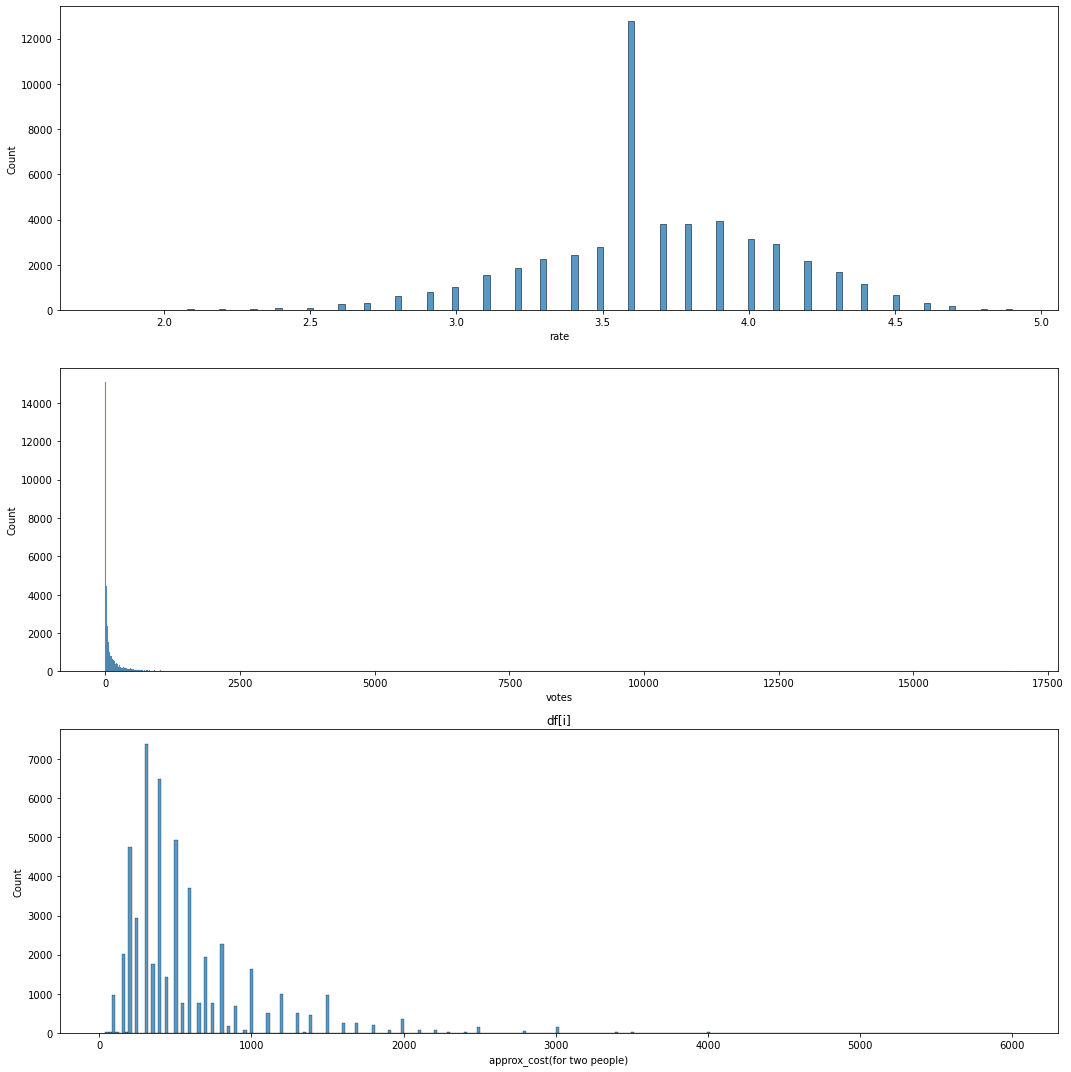

In [23]:
cols=num.columns
fig,ax=plt.subplots(3,1,figsize=(15,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.histplot(df[i],ax=subplot)
    plt.title('df[i]')
plt.tight_layout()
plt.show()


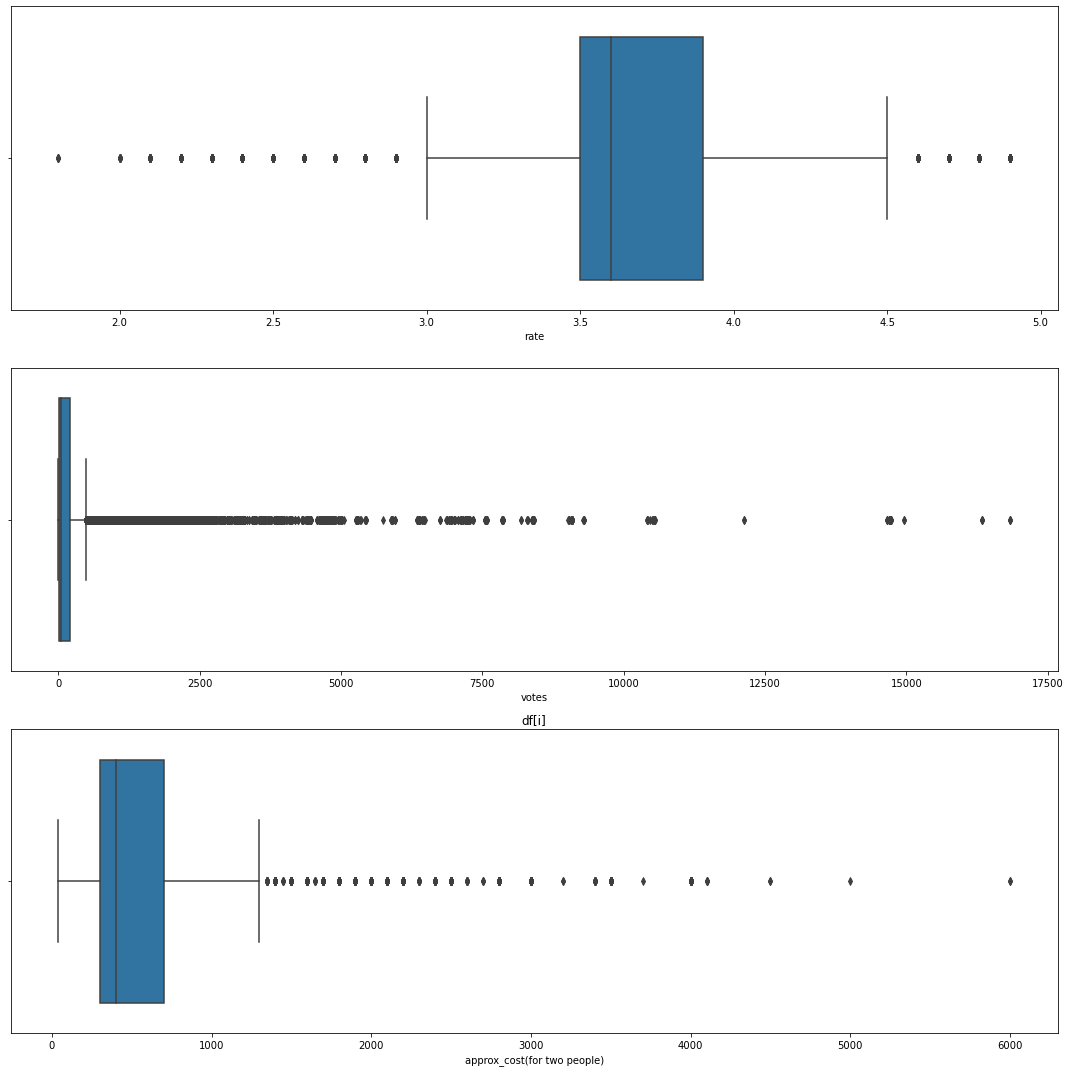

In [24]:
fig,ax=plt.subplots(3,1,figsize=(15,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i],ax=subplot)
    plt.title('df[i]')
plt.tight_layout()
plt.show()


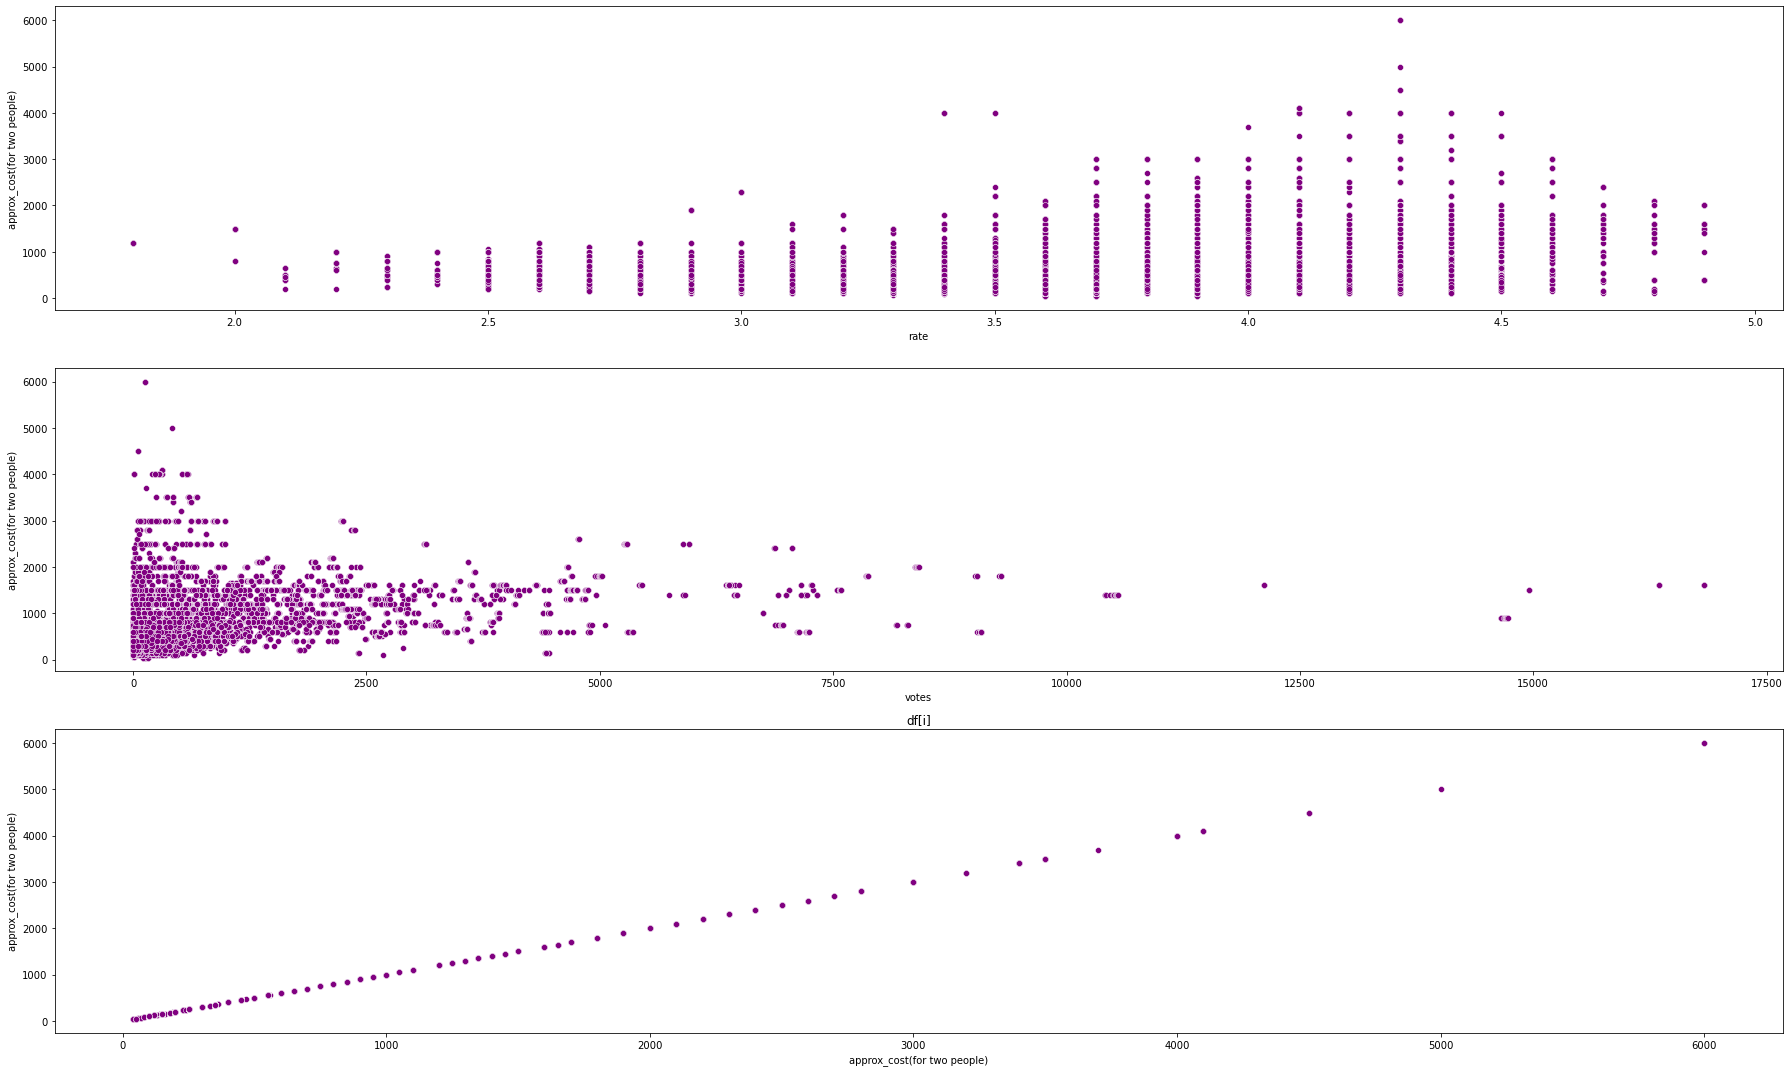

In [25]:
fig, ax= plt.subplots(3,1, figsize=(25,15))

for i, subplot in zip(cols, ax.flatten()):
    sns.scatterplot(df[i],df['approx_cost(for two people)'], ax=subplot,color='purple')
    plt.title('df[i]')

plt.tight_layout()
plt.show()

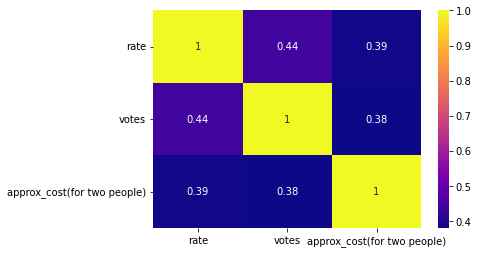

In [26]:
sns.heatmap(df.corr(),annot=True,cmap="plasma")
plt.show()

### 2.2.Outliers

### 2.3.Encoding

In [27]:
#df1=df['rest_type'].str.get_dummies(sep=', ').add_prefix('rest_type ')
df2=df['cuisines'].str.get_dummies(sep=', ').add_prefix('cusisines ')
df3=df['location'].str.get_dummies(sep=', ').add_prefix('location ')
df4=df['listed_in(type)'].str.get_dummies(sep=', ').add_prefix('listed_in(type) ')
df=pd.concat([df,df2,df3,df4],axis=1)
df.head(2)

,online_order,book_table,rate,votes,location,cuisines,approx_cost(for two people),listed_in(type),listed_in(city),cusisines Afghan,...,location Wilson Garden,location Yelahanka,location Yeshwantpur,listed_in(type) Buffet,listed_in(type) Cafes,listed_in(type) Delivery,listed_in(type) Desserts,listed_in(type) Dine-out,listed_in(type) Drinks & nightlife,listed_in(type) Pubs and bars
0,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari,0,...,0,0,0,1,0,0,0,0,0,0
1,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari,0,...,0,0,0,1,0,0,0,0,0,0


In [28]:
df=df.drop(['cuisines','location','listed_in(type)'],axis=1)

In [29]:
df['online_order']=df['online_order'].apply(lambda x: 1 if x=='Yes' else 0)
df['book_table']=df['online_order'].apply(lambda x: 1 if x=='Yes' else 0)

In [30]:
df.head(2)

,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(city),cusisines Afghan,cusisines Afghani,cusisines African,cusisines American,...,location Wilson Garden,location Yelahanka,location Yeshwantpur,listed_in(type) Buffet,listed_in(type) Cafes,listed_in(type) Delivery,listed_in(type) Desserts,listed_in(type) Dine-out,listed_in(type) Drinks & nightlife,listed_in(type) Pubs and bars
0,1,0,4.1,775,800.0,Banashankari,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,1,0,4.1,787,800.0,Banashankari,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [31]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,online_order,book_table,rate,votes,approx_cost(for two people),cusisines Afghan,cusisines Afghani,cusisines African,cusisines American,cusisines Andhra,...,listed_in(city)_Lavelle Road,listed_in(city)_MG Road,listed_in(city)_Malleshwaram,listed_in(city)_Marathahalli,listed_in(city)_New BEL Road,listed_in(city)_Old Airport Road,listed_in(city)_Rajajinagar,listed_in(city)_Residency Road,listed_in(city)_Sarjapur Road,listed_in(city)_Whitefield
0,1,0,4.1,775,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,4.1,787,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,3.8,918,800.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,3.7,88,300.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,3.8,166,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
df.dtypes

online_order                          int64
book_table                            int64
rate                                float64
votes                                 int64
approx_cost(for two people)         float64
                                     ...   
listed_in(city)_Old Airport Road      uint8
listed_in(city)_Rajajinagar           uint8
listed_in(city)_Residency Road        uint8
listed_in(city)_Sarjapur Road         uint8
listed_in(city)_Whitefield            uint8
Length: 241, dtype: object

In [33]:
df.shape

(50812, 241)

## 3.Model Building

### Train-Test-Split

In [34]:
X=df.drop('approx_cost(for two people)',axis=1)
y=df['approx_cost(for two people)']

In [35]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=42)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(40649, 240)
(10163, 240)
(40649,)
(10163,)


### 3.1.Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(xtrain,ytrain)
ypred_train=model.predict(xtrain)
ypred=model.predict(xtest)

In [37]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error,r2_score
print(r2_score(ytrain,ypred_train))
print(r2_score(ytest,ypred))

0.5738236085121329
-155.92351656546242


### 3.2.Lasso (Regularization technique 1)

In [39]:
from sklearn.linear_model import Lasso,Ridge
las =Lasso(alpha=0.1)
ls_mdl = las.fit(xtrain,ytrain)
las_pred_tr = ls_mdl.predict(xtrain)
las_pred = ls_mdl.predict(xtest)

In [40]:
print('r2 score for train :',r2_score(ytrain,las_pred_tr))
print('r2 score for test :',r2_score(ytest,las_pred))

r2 score for train : 0.5694019127912481
r2 score for test : 0.5672194453097683


###  3.3.Ridge (Regularization technique 2)

In [42]:
ridge = Ridge()
rg_mdl = ridge.fit(xtrain,ytrain)
tr_rg_pred = rg_mdl.predict(xtrain)
pred_rg  = rg_mdl.predict(xtest)

In [43]:
print('r2 score for train :',r2_score(ytrain,tr_rg_pred))
print('r2 score for test :',r2_score(ytest,pred_rg))

r2 score for train : 0.5737099600872204
r2 score for test : 0.5714655426669197


### 3.4.Elasticnet (Regularization technique 3)

In [45]:
from sklearn.linear_model import ElasticNet
en = ElasticNet()
mdl_en = en.fit(xtrain,ytrain)
tr_en_pred = mdl_en.predict(xtrain)
pred_en = mdl_en.predict(xtest)

In [46]:
print('r2 score for train :',r2_score(ytrain,tr_en_pred))
print('r2 score for test :',r2_score(ytest,pred_en))

r2 score for train : 0.2647113942425062
r2 score for test : 0.2702675901980416


### 3.5.Decision Tree Regressor

In [48]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr_mdl = dr.fit(xtrain,ytrain)
tr_dr_pred = dr_mdl.predict(xtrain)
pred_dr = dr_mdl.predict(xtest)

In [49]:
print('r2 score for train :',r2_score(ytrain,tr_dr_pred))
print('r2 score for test :',r2_score(ytest,pred_dr))

r2 score for train : 0.997216676291165
r2 score for test : 0.9117562057636159


### 3.6.RandomForestRegressor

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf_mdl=rf.fit(xtrain,ytrain)
tr_rf_pred = rf_mdl.predict(xtrain)
pred_rf = rf_mdl.predict(xtest)

In [52]:
print('r2 score for train :',r2_score(ytrain,tr_rf_pred))
print('r2 score for test :',r2_score(ytest,pred_rf))

r2 score for train : 0.990170823279487
r2 score for test : 0.9413388311088561


# 4. Conclusion

For this project R2_score has been considered as the metric to evluate the performance of each model.

Data has undergone extensive cleaning and encoding due to the presence of several varaibles which have multiple categorical elements in them. Some of the redundant columns have been removed as per the domain understanding.

After performing various algorithms namely, Linear Regression, with their regularization variants of Lasso,Ridge,Elastinet, Decision Tree Regressor and Random Forest Regressor.We can see that Random Forest Regressor gave us the highest R2_score value compared to the rest of the models.